#### 1. Linspace VS arange
#### 1. Homework revisit


## Using Linspace
## I want 2 points, evenly spaced [0,1] inclusive. Then the step size between the two points can be calculated as: 
$$\frac{1-0}{2-1} = 1$$

In [38]:
import matplotlib.pyplot as plt
import numpy as np

lin2 = np.linspace(0,1,2)
print(lin2)

[ 0.  1.]


## I want 3 points, evenly spaced [0,1] inclusive. Then the step size among the 3 points can be calculated as: 
$$\frac{1-0}{3-1} = 0.5$$

In [39]:
## the step size = (1-0)/(3-1)
################################
lin3 = np.linspace(0,1,3)
print(lin3)

[ 0.   0.5  1. ]


## In general, I want N points, evenly spaced [a,b] inclusive. Then the step size among the N points can be calculated as: 
$$\Delta x = \frac{b-a}{N-1}$$

## And all points you get are: $$a, ~ a+\Delta x,~ a+2\Delta x,~a+3\Delta x,\dots,~ a+(N-2)\Delta x,~ a+(N-1)\Delta x$$
## Since $\Delta x = \frac{b-a}{N-1}$, $a+(N-1)\Delta x = a+(N-1) \frac{b-a}{N-1} = b$. 

## For example, I want 11 points between -1.1 and 1.5 (inclusive), these 11 points are evenly spaced [-1.1,1.5]
$$\Delta x = \frac{1.5- (-1.1)}{11-1} = 0.26$$
## The 11 points are: $$-1.1, ~-1.1+0.26,~ -1.1+2\cdot 0.26,~\dots, ~1.5$$

In [41]:
## the step size = (right-left)/(n-1)
################################
left  = -1.1
right = 1.5
N     = 11
lin   = np.linspace(left,right,N)

step_size = (right-left)/(N-1)
print('linspace = ', lin)
print('N points = ',len(lin))

print('step size = ', step_size)

print('step size by difference = ', lin[1:] - lin[:-1])

linspace =  [-1.1  -0.84 -0.58 -0.32 -0.06  0.2   0.46  0.72  0.98  1.24  1.5 ]
N points =  11
step size =  0.26
step size by difference =  [ 0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.26]


## np.arange()
## I want to get points between [0,10) -- 0 inclusive, 10 exclusive. I don't specify how many I want, instead, I want points to be evenly spaced with step size 0.5. 

In [45]:
ara = np.arange(0,10,0.5)
print('not inclusive:\n', ara)

## How to use arange() to get [0,10] -- 0 inclusive and 10 inclusive, with step size 0.5
ara_inclusive = np.arange(0,10+0.5, 0.5)
print('inclusive:\n', ara_inclusive)

not inclusive:
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]
inclusive:
 [  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10. ]


## In general, I want to get points between [a,b) -- a inclusive, b exclusive -- of step size $\delta x$. Then all points I obtain are
## $a,~ a+\delta x,~ a+2\delta x, ~a+3\delta x,~\dots,~ a+K\delta x $, where $K$ is the largest integer such that $a+K\delta x < b$

## In total, I will obtain $int\left(\frac{b-a}{\delta x}\right)$ many points. 

In [47]:
ara = np.arange(0,10,0.5)
print(ara)
print(len(ara))
print(int( (10 - 0)/(0.5) ) )

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]
20
20


## np.arange() vs np.linspace()

## Question: I want to plot sin function, where x is between 0 and 4pi, inclusive.

## We first need to specify x-axis points, then plug in these values to np.sin()
## To obtain x-axis values, we either 
1. use linspace to obtain say 100 x-values between  0 and 4pi, 
1. or  use  np.arange to specify  x-values between  0 and 4pi with some step size.


In [48]:
import matplotlib.pyplot as plt
import numpy as np

### 1-d array with 100 elements from 0 to 4pi, with step 4pi/10
### linspace specifies: 100 points evenly spaced  [0, 4*pi] inclusive
### note the distance between adjacent points is 4*np.pi/99

xpts = np.linspace(0,4*np.pi,100)

## np.arange specifies: [0, 4*pi) step between points is 4*np.pi/100, 
## but 4*pi is not included
#xpts_arange  = np.arange(0,4*np.pi,4*np.pi/100)

xpts_to_line = np.arange(0,4*np.pi+4*np.pi/99, 4*np.pi/99)


print(np.array_equal(xpts,xpts_to_line))

True


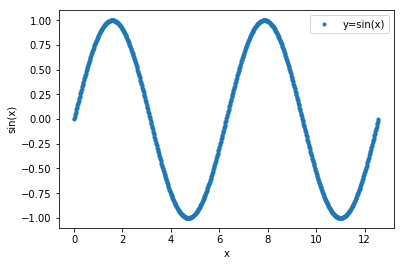

In [59]:
xpts = np.linspace(0,4*np.pi,1000)

# y is sin of x
y = np.sin(xpts)

# plot the y = sin(x) function where x is between 0 and 4pi
# alpha is between 0 and 1, this is a value changes transparency
# '.' is for shape, you can also have '.-' just try different shapes
plt.plot(xpts,y,'.',label = u'y=sin(x)')#,color = 'blue',alpha = 0.6)

plt.xlabel("x")
plt.ylabel("sin(x)")

plt.legend()
plt.show()

# Past lab revisit
1. invCDF(arr, lam)
1. sampling
1. LLN
1. central limit


## The idea -- Inverse sampling

The basic idea behind the inverse transform method is to transform uniform samples into samples from a different distribution. 

The CDF (cummulative density function) of a distribution  is a function that ranges from  0 to 1. 

you  use $$Uniform(0,1)$$ to generate a random number, say 0.63. Now map this number on the range (or y-axis) to a x using the CDF curve to generate a sample. This process is illustrated below:

![](invtrans.png)

The right hand side image is the CDF while the left hand side is the pdf we want to sample from.

## Let us formalize this:

This is the process:

1. get a uniform sample $u$ from $Unif(0,1)$
1. solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire. 
1. repeat.

In [67]:
invCDF = lambda U,lam: -np.log(1-U)/lam

# 1. get a uniform sample $u$ from $Unif(0,1)$
u = np.random.rand(1)

# 1. solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire. 
x = invCDF(u,1.5)

# 1. get N uniform sample $u$ from $Unif(0,1)$
N = 10000
u = np.random.rand(N)

# 1. solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire. 
# And u now is an array of N numbers, use inverse sampling, will provide us with N samples following exp(0.5)
X = invCDF(u,1.5)

# The histogram of the samples $X$  you generated should look like the probability density of exp(0.5)

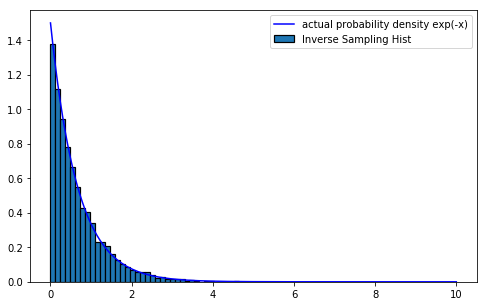

In [68]:
# plot the histogram of these samples 
plt.figure(figsize=(8,5))

plt.hist(X,  normed=1, bins= 50, label=u'Inverse Sampling Hist', 
         edgecolor='black', linewidth=1.2);

# plot our pdf function
# pdf of exp(0.5)
exp_pdf = lambda arr,lam : lam*np.exp(-lam*arr)*(arr>0)
xvals   = np.linspace(1e-5, 10, 1000)

plt.plot(xvals, exp_pdf(xvals,1.5), 'b', 
         label=u'actual probability density exp(-x)')
plt.legend()
plt.show()

## Average of the samples? Note that expected value (mean) of an exponential distribution is $\frac{1}{\lambda}$; variannce of an exponential distribution is $\frac{1}{\lambda^2}$

## for $\lambda = 0.5$, $E(X)= 1/0.5 = 2$, $Var(X) = 1/0.5^2 = 4$

## Let's look at the sample mean and variance


In [69]:
print('sample mean', X.mean())
print('sample vari', X.var())
print('1/lam',1/1.5)
print('1/lam^2',1/1.5**2)

sample mean 0.666161495349
sample vari 0.427360763927
1/lam 0.6666666666666666
1/lam^2 0.4444444444444444


## The above histogram shows that our samples (generate by invCDF through uniform(0,1) indeed gives exp(0.5) distribution. Now we want to repeat the same experiment, say 100 times, then we will obtain 100 different sample mean. We want to see what the histogram of these sample means look like.

## This is the process:

1. get a uniform sample $u$ from $Unif(0,1)$
1. solve for $x$ yielding a new equation $x=F^{-1}(u)$ where $F$ is the CDF of the distribution we desire. 
1. repeat 100 times

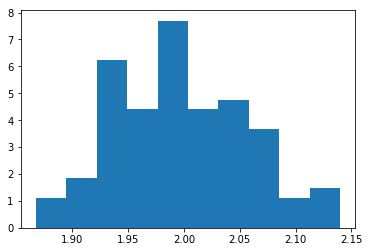

In [70]:
repeat_N_times  = 100
N = 1000

mean_of_samples = np.zeros(repeat_N_times)

for i in range(repeat_N_times):
    u = np.random.rand(N)
    X = invCDF(u,0.5)
    mean_of_samples[i] = X.mean()

plt.hist(mean_of_samples,normed = 1)
plt.show()

### We can see that the histogram above looks like a belt curve (normal distribution). It centered around 2. By Central limit the histogram above should look like a normal distribution with mean 2 and std as the following:
### $$\begin{eqnarray}
V(\bar{x}) &=& \frac{\sigma^2}{N}
\end{eqnarray}$$
### We should have the variance is approximately X.var() or $$\frac{\sigma^2}{N} = (1/0.5^2)/1000$$

### Now I want to plot the above histogram and the corresponding Normal distribution together

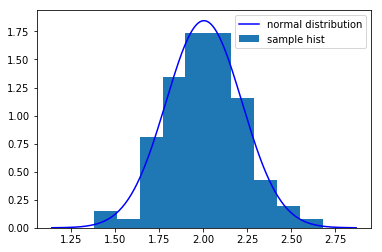

In [86]:
## Histogram: by copy and past the above code:
repeat_N_times  = 200
N = 90
mean_of_samples = np.zeros(repeat_N_times)
for i in range(repeat_N_times):
    u = np.random.rand(N)
    X = invCDF(u,0.5)
    mean_of_samples[i] = X.mean()
plt.hist(mean_of_samples,normed = 1,
         label = 'sample hist')

## plot normal distribution 
import scipy as sp
import scipy.stats
# call the normal distribution from scipy.stats
# specify normal distribution's mean and standard deviation
norm      = scipy.stats.norm
norm_mean = mean_of_samples.mean()
norm_std  = mean_of_samples.std()

#norm_std   = np.sqrt( 4/N )
xpts = np.linspace(norm_mean-4*norm_std,norm_mean+4*norm_std,200)
#xpts = np.linspace(-10,10,200)
ypts = norm.pdf(xpts,norm_mean,norm_std)

plt.plot(xpts, ypts, '-',
         c = 'blue',label = 'normal distribution')

plt.legend()
plt.show()

## Now we want to use the invCDF to generate samples -- following exp(0.5), and to see how their average behave (i.e. central limit)

## The way to visualize it or to do the experiments, we set the following:
1. We will do a large set M=1000 of experiments 
1. In each experiment, we will obtain 200 samples.
1. For the $N^{th}$ experiment, each sample is of size $N$. To obtain one sample, this means that you generate N random numbers $X_i$~$exp(\lambda)$, $i = 1,2,\dots,N$. One sample will be stored as $$\frac{\sum_{i=1}^{N}X_i}{N}~.$$ Then you repeat "generating one sample" 200 times, to obtain 200 samples.

1. For example: 
    1. the first experiment, you will generate 200 samples; each sample is of size 1, which is 1 random number $X_1$~$exp(\lambda)$; Then you store each sample as $$\frac{X_1}{1}$$ In total, you have 200 of them
    1. the 1000 th experiment, you will generate 200 samples; each sample is of size 1000, which are 1000 random numbers $X_i$~$exp(\lambda)$, $i = 1,2,\dots,1000$. One sample will be stored as $$\frac{\sum_{i=1}^{1000}X_i}{1000}$$
    In total, you have 200 of them